# <font color=maroon>Introduction

This notes provides few ideas of sampling distribution of sample mean and variance

**<font color=blue>Suggested Reading: [CABE] Casella, G., & Berger, R. L. (2002). Statistical inference (Vol. 2). Pacific Grove, CA: Duxbury; specifically, Chapters 3 and 5</span>**

**<font color=violet>Keywords:**

* Long-run probability
* Theoretical Distributions
* Target Population
* Sampled Population
* Random Sample
* Statistics

## Sampling Distribution

Frequntist probability of an event $\mathcal{A}$ (from a random experiment, $\mathcal{E}$) is based on relative frequency (number of times $\mathcal{A}$ is repeated) in many trials of $\mathcal{E}$. Here, probability is defined as a repeatable objective way out of "sufficiently" long-run of the experiment. This may be understood as

$$p(\mathcal{A})= \lim_{n \to \infty} \frac{m}{n}$$

where $n$ is the number of trials of $\mathcal{E}$ and $m$ is  the frequency of $\mathcal{A}$ in $n$ trials

This basic notion is considered while building the inferential principles of frequntist statistics. Most of the studies (involved with random experiments) are conducted with samples drawn from a study population which is a part (or subset) of a target population about which the study is aimed to generalize the findings from sample. In this process, data is expected to be a repeatable process in that samples are drawn from many trials. There could be many sampling methods through which data are collected for a reasonable way to get representative samples so as to generealize the quantity of interest (parameter) about the population. Further, it is assemed that parameters are fixed constant but random and **inference** about it can be done via the samples

While doing so, it is assuemd that (theoretically) once the quantity leading to the parameter is calculated from each sample for "sufficiently large" number of times. That gives a distribution of values for the parameter calculated from the sample which is called **statistic** and the distribution is said to be **Sampling distribution**

# <font color=maroon> An Example - Sampling Distribution

Let us consider our population is Uniform (0,1). So population mean is 0.5

Now we shall sample (of fixed size 'n') from this hypothetical population

Calculate mean of these sampled items

Repeat the process for "sufficently" large number (k) of times

### <font color=darkblue> **Code Decription**

This code illustrates a core concept in the **Frequentist approach to statistical inference** — the idea of a **sampling distribution**. In the Frequentist framework, probability is interpreted as a **long-run relative frequency** based on repeated sampling, and statistical inference is made by understanding how sample statistics behave across these repetitions.

To demonstrate this, we repeatedly draw samples from a **Uniform[0, 1]** distribution, which has a true population mean of 0.5. For each of the `k = 50` repetitions, a random sample of size `n = 100` is taken, and its sample mean is computed. These means form the **sampling distribution of the sample mean**, which is plotted against the sample number. The red dashed line indicates the overall mean of these sample means, which should approach 0.5 — the population mean — due to the **Law of Large Numbers**.

This visualization reinforces the Frequentist idea that:
- The **sampling distribution** becomes more concentrated around the population parameter as the **sample size `n` increases**.
- The shape and behavior of the **sampling distribution** become more evident as the **number of repetitions `k` increases**.

Together, this captures the essence of the Frequentist view — that inference is about understanding how statistics behave **under repeated sampling**, and that reliable estimates arise through the long-run behavior of sample statistics.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#INPUTS
n=100 #sample size
k=50 #Repetition

In [ ]:
#Function to compute mean of a sample
def avg(a) :
    return(np.mean(np.random.rand(a)))

data=np.full(k,n)
new_list = list(map(avg,data))

In [ ]:
dd=pd.DataFrame(new_list)
dd.columns=["Avg"]
dd["Sample"] = range(1, k+1)
# Calculate overall mean
overall_mean = dd["Avg"].mean()
dd = dd[["Sample", "Avg"]]
dd.head()

,Sample,Avg
0,1,0.539338
1,2,0.535065
2,3,0.494997
3,4,0.466963
4,5,0.477638


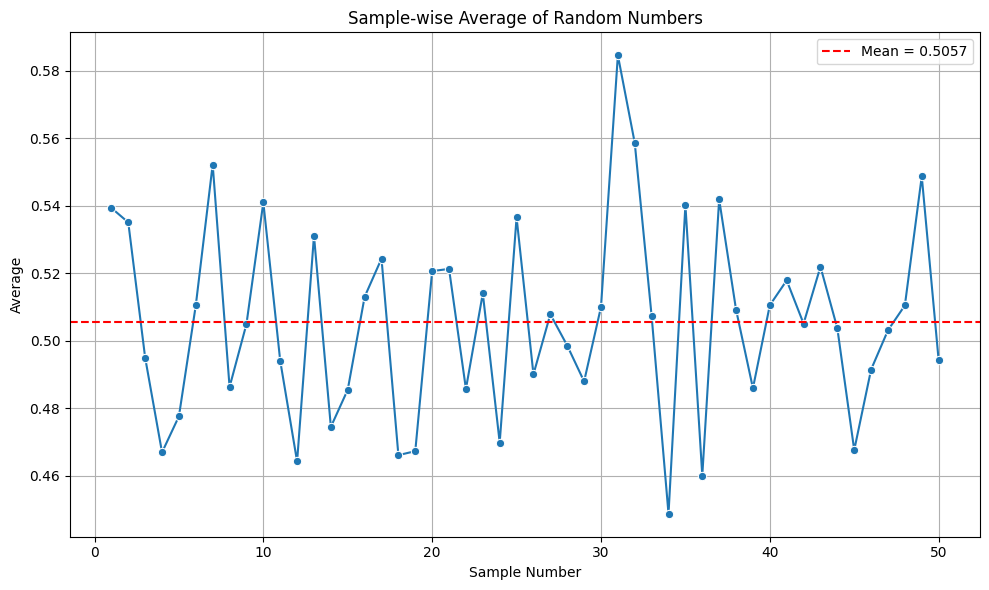

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dd, x="Sample", y="Avg", marker="o")
plt.axhline(overall_mean, color='red', linestyle='--', label=f'Mean = {overall_mean:.4f}')
plt.title("Sample-wise Average of Random Numbers")
plt.xlabel("Sample Number")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Note:
If this repetition process is run again for different combunation of `k` and `n`, the specific sample means will differ due to randomness, but the overall pattern will remain the same — the sample means will continue to center around the true population mean of 0.5.

---

### **Interactive Widget: Exploring the Sampling Distribution of the Sample Mean (Frequentist Approach)**

This interactive widget allows you to explore the concept of the **sampling distribution** within the **Frequentist framework** of statistics. Using samples drawn from a uniform distribution \([0, 1]\), the widget simulates repeated sampling and visualizes how the sample means behave.

You can adjust:
- **Sample Size (n):** Number of data points in each sample.
- **Repetitions (k):** Number of times the sampling process is repeated.

Click **"Run Simulation"** to generate new samples and observe the resulting sample means. A red dashed line indicates the overall average of these sample means.

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Core simulation and plotting function
def simulate_sampling_distribution(n, k):
    def avg(a):
        return np.mean(np.random.rand(a))

    data = np.full(k, n)
    new_list = list(map(avg, data))

    dd = pd.DataFrame(new_list, columns=["Avg"])
    dd["Sample"] = range(1, k + 1)
    dd = dd[["Sample", "Avg"]]  # Reorder columns

    overall_mean = dd["Avg"].mean()

    # Plotting
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=dd, x="Sample", y="Avg", marker="o")
    plt.axhline(overall_mean, color='red', linestyle='--', label=f'Mean = {overall_mean:.4f}')
    plt.title("Sampling Distribution of the Sample Mean")
    plt.xlabel("Sample Number")
    plt.ylabel("Sample Mean")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Additional text output
    print(f"Overall mean of sample means: {overall_mean:.4f}")
    print("Note: Rerunning will change individual values, but the mean will consistently approach 0.5.")

# Create sliders for sample size and repetitions
n_slider = widgets.IntSlider(value=100, min=10, max=1000, step=10, description='Sample Size (n):')
k_slider = widgets.IntSlider(value=50, min=10, max=200, step=10, description='Repetitions (k):')
run_button = widgets.Button(description="Run Simulation", button_style='success')

output = widgets.Output()

# Button click event
def on_button_click(b):
    with output:
        clear_output(wait=True)
        simulate_sampling_distribution(n_slider.value, k_slider.value)

run_button.on_click(on_button_click)

# Display the widgets
display(widgets.VBox([n_slider, k_slider, run_button, output]))




## <font color=darkgreen>Some Useful Statistic - Function of random sample that has no parameter

Let $X_1,......X_n$ be a random sample from a density $f(X|\theta$), then some statistics are

**1. Sample Mean**

  $\bar{X_n} = \frac{1}{n}\sum X_i$
  
**2. Sample moments about Zero**

  $M^{'}_r = \frac{1}{n}\sum X^r_i$  

**3. Sample moments about $\bar{X_n}$**
    
  ${M_r}  = \frac{1}{n}\sum(X_i-\bar{X})^r$
  
**4. Sample Variance**
  
  ${S^2}  = \frac{1}{(n-1)}\sum(X_i-\bar{X})^2$
                                            
For a random variable X, consider population $r^{th}$ moments

1. Non central moments: $\mu^{'}_r = E[X^r]$

2. Central moments:$\mu_r = E[(X-\mu)^r]$

In particular, the Mean of X is $\mu = \mu_1^{'} = E(X)$
  
Now, Consider $M^{'}_r$
  
  $E[M^{'}_r] = E\Big[\frac{1}{n}\sum_{i=1}^n {X_i}^r\Big]$
  
  $=\frac{1}{n}\sum E({X_i}^r)$
  
  $=\frac{1}{n}\sum {\mu'_r}$
  
  $\Rightarrow E[M'_r] = {\mu'_r}$
   
Also $V[M^{'}_r] = V \Big[\frac{1}{n}\sum {X_i}^r\Big]$ where V denotes the variance
   
   $= \frac{1}{n^2}\sum V({X_i}^r)$
   
   $= \frac{1}{n}\Big[E({X_i}^{2r}) - E({X_i^r})^2\Big]$
   
   $V\Big[{M'_r}\Big] = \frac{1}{n}\Big[{\mu'_{2r}}-{\mu'_r}^2\Big]$
  
  In Particular if r = 1,
  
1. $E[M^{'}_1] = E[\bar{X_n}] = \mu^{'}_1 = \mu$

2. $V[M^{'}_1] = V[\bar{X}_n]$

   $= \frac{1}{n}[\mu^{'}_2 - ({\mu^{'}_1})^2]$
   
  $= \frac{1}{n}{\sigma}^2$
  
This holds for any $f(X~|~\theta)$ with $\mu = E(X)$ and $\sigma^2 = V(X)$

**Regarding Sample Variance:**

${S^2}  = \frac{1}{n-1}\sum(X_i-\bar{X})^2$
  
$E[S^2] = \frac{1}{n}\sum_{i=1}^n E{({X_i}-\bar X)}^2$


Now, $\sum{({X_i}-\mu)}^2 = \sum{({X_i}-\bar{X}+\bar{X}-\mu)}^2$

 $= \sum[{({X_i}-\bar{X})}^2 + {(\bar{X}-\mu)}^2 + 2({X_i}-\bar{X})(\bar{X}-\mu)]$

 $= \sum{({X_i}-\bar{X})}^2 + n{(\bar{X}-\mu)}^2 + 2(\bar{X}-\mu)\sum({X_i} -\bar{X})$

Since,$2(\bar{X}-\mu)\sum({X_i}-\bar{X}) = 0$
  
$\sum {({X_i}-\mu)}^2$

$= \sum{({X_i}-\bar{X})}^2 + n{(\bar{X}-\mu)}^2$
  
So

$E[S^2] = \frac{1}{n-1} E\Big[\sum {({X_i}-\mu)}^2  - n{(\bar{X}-\mu)}^2\Big]$

$= \frac{1}{n-1} [\sum E{({X_i}-\mu)}^2  - nE{(\bar{X}-\mu)}^2 ]$

$= \frac{1}{n-1} \Big[\sum {\sigma}^2  - nV(\bar{X})\Big]$

$= \frac{1}{n-1} [n{\sigma}^2  - n \frac{{\sigma}^2}{n}]$

$= {\sigma}^2$
  

Hence for $X_1, X_2, .....X_n \sim f(X~|~\theta)$  then
  
  $E[S^2] = {\sigma}^2$
  
Also, $V[S^2] =  \frac{1}{n}\Big[\mu_4 - \frac{n-3}{n-1}\mu_2^2\Big]$
  
###<font color=darkblue> Example 1.  

Let $X_1, X_2, .....X_n \sim Bern~(\theta)$
  
  Using the properties of sample mean,
   
  $E[\bar{X}]=\mu = \theta$
  
  $V[\bar{X}]=\frac{\sigma^2}{n} = \frac{\theta(1-\theta)}{n}$
  

###<font color=darkblue> Example 2.  

Let $X_1, X_2, .....X_n \sim Poisson~(\theta)$

  Using the properties of sample mean
  
  $E[\bar{X}]=\mu = \theta$
  
  $V[\bar{X}]=\frac{\sigma^2}{n} = \frac{\theta}{n}$
  
###<font color=darkblue> Example 3.  

Let $X_1, X_2, .....X_n \sim Expo (\theta)$

Here, $\theta$ is the rate parameter(=$\frac{1}{scale}$)

This example illustrates the distribution of sample mean.
  
  $\sum X_i \sim Gamma~(n,\theta)$
  
PDF is $\frac{{\theta}^n}{\sqrt{n}}z^{n-1} e^{-\theta z}$

where  $Z = \sum {X_i}>0$
  
$\Rightarrow p\Big[\sum X_i\leq y\Big]=\int_0^y ~\frac{\theta^n}{\sqrt{n}} z^{n-1} e^{-\theta z}~dz$
  
$p[\bar{X} \leq \frac{y}{n}] = \int_0^y\frac{{\theta}^n}{\sqrt{n}}z^{n-1} e^{-\theta z} ~dz$
  
Now, $x =\frac{y}{n} \Rightarrow  y = nx$
  
$p[\bar{X_n} \leq {x}] = \int_0^{nx}\frac{{\theta}^n}{\sqrt{n}}z^{n-1} e^{-\theta z}~dz$
  
Let $u =\frac{\sum{x_i}}{n}=\frac{z}{n}$
  
When z = 0, then u = 0; when z = nx then u = x.  Also z = un implies dz = ndu

$p[\bar{X_n} \leq {x}] = \int_0^{x}\frac{{\theta}^n}{\sqrt{n}} {(un)}^{n-1}e^{-n~\theta~u}~n~du$

$= \int_0^{x}\frac{{(n\theta)}^n}{\sqrt{n}} {u}^{n-1}e^{-n\theta u}~du$
  
Therefore $\bar{X}$, sample mean follows Gamma(n,n$\theta$). Hence,we have the following results from the summaries of a Gamma distribution with rate parameter $\theta$
  
1. Mean of $\bar{X}$ is $E\Big[\bar{X}\Big]=\frac{n}{n\theta}=\frac{1}{\theta}$

2. Variance of $\bar{X}$ is $V\Big[\bar{X}\Big]=\frac{n}{n^2\theta^2}=\frac{1}{n\theta^2}$

Further one can easily understand that these results are the same when it is obtained from the properties of sample mean, when $X_1, X_2, .....X_n \sim Expo (\theta)$.
                  

###<font color=darkblue> Results regarding Normal distribution/Random sample from Normal population

Let $X_1, X_2, .....X_n \sim N({\mu},~{\sigma}^2)$ then


1. $\frac{\bar X-\mu}{\sigma} \sim N(0,\frac{1}{n})$
       
2. $\bar X$ and $\sum(X_i-\bar X)^2$ are mutually independent
       
3. $\frac{(n-1)s^2}{\sigma^2} \sim {\chi^2_{(n-1)}}$
  
  
## <font color=darkgreen> These results exemplify the way sampling distributions are defined for a statistic